# MFCC and Gaussian Mixture Models for Speaker Recognition
    
This python program aims to tackle speaker recognition as a machine learning problem. 
The program generates and uses the Mel-frequency cepstrum coefficients of the samples for feature extraction. It then generates Gaussian Mixture Models for each subject. The models predict the subject for a given test sample by comparing its extracted features to the trained models.

Institution: New York University, Tandon School of Engineering<br>
Instructor: Sundeep Rangan<br>
Authors: Michael Chen, William Xia<br>

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import wave, os, glob
%matplotlib inline

In [3]:
import librosa
import librosa.display
import librosa.feature
from sklearn.mixture import GaussianMixture as GMM

In [4]:
def preprocess_data(subject_num, block_size, threshold):
    """
    Given a subject number:
        - retrieve data from directory 
        - remove low power components
        - divide the continuous sound vector into uniform blocks
        - compute MFCC for each block
    
    Returns:
        - S, tensor of shape (num_samp, n_mels)
    
    """ 
    
    # Create empty vector to store data
    subject = []
    
    # Define path
    path = "/Users/willi/EE4563/speech_samples/subject_"+subject_num+"/left-headed"
    
    # Retrieve data from directory, concatenate all wav file data in the target directory
    for filename in glob.glob(os.path.join(path, '*.wav')):
        y, sr = librosa.load(filename)    
        subject = np.append(subject,y)

    # Remove low power components
    low_ind = (abs(subject) <= threshold)
    subject[low_ind] = 0
    
    subject_active = subject[subject != 0]
    
    num_samples = int(np.floor(len(subject_active)/block_size))
    
    # Reshape data into blocks of samples
    subject_seg = subject_active[0:(num_samples*block_size)]
    subject_seg = np.reshape(subject_seg,(num_samples,-1))
    
    block_time = (librosa.feature.melspectrogram(y=subject_seg[0,:], sr=sr, n_mels=128, fmax=8000)).shape[1]
    S = np.empty((0,128,block_time))
    
    print("SUBJECT ",subject_num)
    print("Generating MFCC for %d total samples." %num_samples)
    
    # Generate MFCC over each sample
    for n in range(0,num_samples):

        S = np.append(S,librosa.feature.melspectrogram(y=subject_seg[n,:], sr=sr, n_mels=128, fmax=8000)[None,:,:],axis = 0)
        if n % 500 == 0:
            print(n," samples done")
            
    print("* COMPLETE *")
    
    # Plot the spectrogram of the first block/sample
    librosa.display.specshow(librosa.logamplitude(S[0,:,:],ref_power=np.max),
                             y_axis='mel', fmax=8000, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel spectrogram\nSubject %s Block 0' %subject_num)
    plt.tight_layout()
        
    return S[:,:,0]

In [5]:
def check_user(speech_samp,model1, model2, model3, model4):
    """
    Given a speech sample fragment and four possible speaker models:
        - determine how likely the sample came from each of the models
        - print the predicted speaker the speech sample belongs to
            
    Returns: NONE
    
    """ 
    
    # Score the speech sample using each given model
    scores = np.array(([model1.score(speech_samp),model2.score(speech_samp),
                        model3.score(speech_samp),model4.score(speech_samp)]))
    
    # The largest value in the score vector corresponds to the most likely speaker
    predicted_speaker = np.argmax(scores)+1
    print("The predicted speaker is subject %d" %predicted_speaker)
    

In [6]:
# Define basic parameters

block_size = 256
threshold = 0.05
nts = 1000
ncomp = 8

SUBJECT  1
Generating MFCC for 13899 total samples.
0  samples done
500  samples done
1000  samples done
1500  samples done
2000  samples done
2500  samples done
3000  samples done
3500  samples done
4000  samples done
4500  samples done
5000  samples done
5500  samples done
6000  samples done
6500  samples done
7000  samples done
7500  samples done
8000  samples done
8500  samples done
9000  samples done
9500  samples done
10000  samples done
10500  samples done
11000  samples done
11500  samples done
12000  samples done
12500  samples done
13000  samples done
13500  samples done
* COMPLETE *


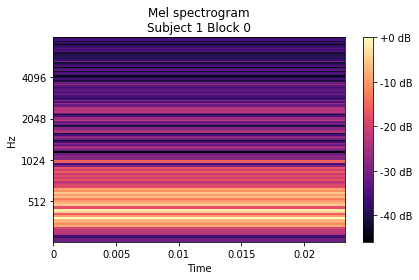

In [7]:
# Preprocess data for subject 1

subject = '1'
S1 = preprocess_data(subject,block_size,threshold)

SUBJECT  2
Generating MFCC for 20319 total samples.
0  samples done
500  samples done
1000  samples done
1500  samples done
2000  samples done
2500  samples done
3000  samples done
3500  samples done
4000  samples done
4500  samples done
5000  samples done
5500  samples done
6000  samples done
6500  samples done
7000  samples done
7500  samples done
8000  samples done
8500  samples done
9000  samples done
9500  samples done
10000  samples done
10500  samples done
11000  samples done
11500  samples done
12000  samples done
12500  samples done
13000  samples done
13500  samples done
14000  samples done
14500  samples done
15000  samples done
15500  samples done
16000  samples done
16500  samples done
17000  samples done
17500  samples done
18000  samples done
18500  samples done
19000  samples done
19500  samples done
20000  samples done
* COMPLETE *


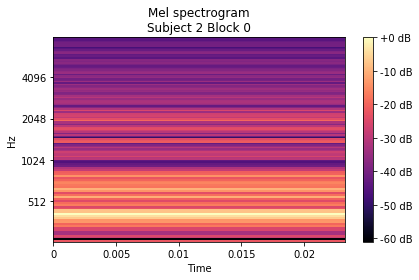

In [8]:
# Preprocess data for subject 2

subject = '2'
S2 = preprocess_data(subject,block_size,threshold)

SUBJECT  3
Generating MFCC for 12453 total samples.
0  samples done
500  samples done
1000  samples done
1500  samples done
2000  samples done
2500  samples done
3000  samples done
3500  samples done
4000  samples done
4500  samples done
5000  samples done
5500  samples done
6000  samples done
6500  samples done
7000  samples done
7500  samples done
8000  samples done
8500  samples done
9000  samples done
9500  samples done
10000  samples done
10500  samples done
11000  samples done
11500  samples done
12000  samples done
* COMPLETE *


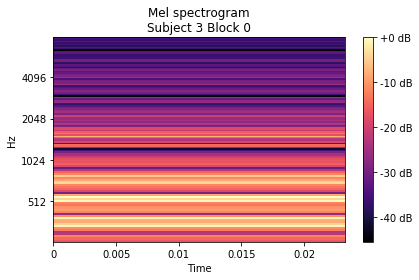

In [9]:
# Preprocess data for subject 3

subject = '3'
S3 = preprocess_data(subject,block_size,threshold)

SUBJECT  4
Generating MFCC for 10433 total samples.
0  samples done
500  samples done
1000  samples done
1500  samples done
2000  samples done
2500  samples done
3000  samples done
3500  samples done
4000  samples done
4500  samples done
5000  samples done
5500  samples done
6000  samples done
6500  samples done
7000  samples done
7500  samples done
8000  samples done
8500  samples done
9000  samples done
9500  samples done
10000  samples done
* COMPLETE *


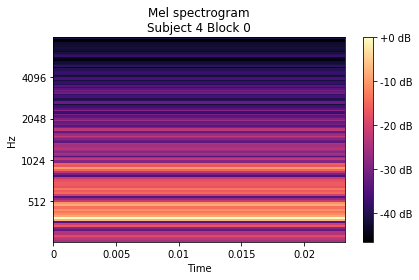

In [10]:
# Preprocess data for subject 4

subject = '4'
S4 = preprocess_data(subject,block_size,threshold)

In [11]:
# Split training/test data and fit Gaussian Mixture Model for subject 1

ntr1 = S1.shape[0]-nts

Xtr1 = S1[:ntr1,:]
Xts1 = S1[ntr1:,:]
gmm1 = GMM(n_components=ncomp)

# Fit model to training data
gmm1.fit(Xtr1)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=8, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [12]:
# Split training/test data and fit Gaussian Mixture Model for subject 2

ntr2 = S2.shape[0]-nts

Xtr2 = S2[:ntr2,:]
Xts2 = S2[ntr2:,:]
gmm2 = GMM(n_components=ncomp)

# Fit model to training data
gmm2.fit(Xtr2)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=8, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [14]:
# Split training/test data and fit Gaussian Mixture Model for subject 3

ntr3 = S3.shape[0]-nts

Xtr3 = S3[:ntr3,:]
Xts3 = S3[ntr3:,:]
gmm3 = GMM(n_components=ncomp)

# Fit model to training data
gmm3.fit(Xtr3)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=8, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [15]:
# Split training/test data and fit Gaussian Mixture Model for subject 4

ntr4 = S4.shape[0]-nts

Xtr4 = S4[:ntr4,:]
Xts4 = S4[ntr4:,:]
gmm4 = GMM(n_components=ncomp)

# Fit model to training data
gmm4.fit(Xtr4)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=8, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [16]:
# Compute a matrix on the scores 
# Ideally, the values on the diagonals should be high, while the off-diagonal values low

scores = np.array(([gmm1.score(Xts1),gmm2.score(Xts1),gmm3.score(Xts1),gmm4.score(Xts1)],
                   [gmm1.score(Xts2),gmm2.score(Xts2),gmm3.score(Xts2),gmm4.score(Xts2)],
                   [gmm1.score(Xts3),gmm2.score(Xts3),gmm3.score(Xts3),gmm4.score(Xts3)],
                   [gmm1.score(Xts4),gmm2.score(Xts4),gmm3.score(Xts4),gmm4.score(Xts4)]))

print(scores)

[[  96.18561701   94.23030309   72.2948307    55.12997124]
 [  69.68478661   88.42666048   55.0195013    -1.05834359]
 [ -64.70211491  -58.62552334   44.33784437 -206.60817366]
 [  70.5601071    77.75093071  129.28673197  134.94173002]]


In [19]:
# Use the test data from each speaker to test the models

check_user(Xts4,gmm1,gmm2,gmm3,gmm4) # Speaker 4
check_user(Xts1,gmm1,gmm2,gmm3,gmm4) # Speaker 1
check_user(Xts3,gmm1,gmm2,gmm3,gmm4) # Speaker 3
check_user(Xts2,gmm1,gmm2,gmm3,gmm4) # Speaker 2

The predicted speaker is subject 4
The predicted speaker is subject 1
The predicted speaker is subject 3
The predicted speaker is subject 2


## NOTES:

-  Based on the matrix of scores (similar a confusion matrix), we can see in columns two and three that the Gaussian models for speakers 2 and 3 are not best modeled by their respective speakers. Thus, through the study of either model 2 or model 3, they will select the incorrect speaker for which they were trained on.<br>
-  This has little consequence for the problem we approach however, since we test a speech sample across the models, rather than a model across the speakers. This is evident since the check_speaker function correctly identifies the speaker for all four samples.<br>
-  Smaller block sizes may have resulted in more samples and an optimizer may be implemented to maximize a speech sample's score with its model over the block_size-to-num_samp relationsip. Additionally, this system can be generalized to a larger number of speakers. However, to save computation time, a relatively small pool of four speakers was used and a constant block size was chosen.